# Analysis

## Set-up data for the experiments

In [2]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_micro_cohort/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_datetime_adm,death_datetime_adm,death_0_7_adm,death_0_14_adm,death_0_21_adm,death_0_30_adm,death_0_60_adm,...,labs_Prothrombin time (PT)_last,labs_INR in Platelet poor plasma by Coagulation assay_last,labs_aPTT in Blood by Coagulation assay_last,labs_Specific gravity of Urine by Test strip_last,labs_pH of Urine by Test strip_last,labs_Bilirubin.total in Serum or Plasma_last,labs_Aspartate aminotransferase in Serum or Plasma_last,labs_Alanine aminotransferase in Serum or Plasma_last,labs_Alkaline phosphatase in Serum or Plasma_last,labs_Albumin in Serum or Plasma_last
0,-1788739119,-2142878850,2159-05-24,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,15.9,1.5,32.500000,1.020300,6.620000,1.900000,38.000000,19.000000,154.000000,3.320500
1,-1788739119,-2142878850,2159-05-26,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,14.8,1.4,33.800000,1.016395,6.905000,2.328000,58.430000,43.331667,181.220000,2.836500
2,-1788739119,-2142878850,2159-05-27,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,12.5,1.1,35.900000,1.016577,6.820000,1.000000,27.000000,16.000000,151.000000,2.679500
3,-1788739119,-2142878850,2159-05-28,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,11.8,1.1,37.000000,1.015025,6.845000,2.486833,46.225000,67.945000,223.955000,2.695000
4,-1788739119,-2142878850,2159-05-29,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,12.2,1.1,40.841917,1.019545,6.675000,1.500000,54.995000,80.800000,240.260000,2.519500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,-195010687,2141255146,2126-08-24,2126-08-10 12:54:00,2134-04-12 00:25:00,0,0,0,0,0,...,13.7,1.2,24.900000,1.019160,6.675000,1.448000,76.670000,132.130000,212.636667,3.743500
5610,-195010687,2141255146,2126-08-25,2126-08-10 12:54:00,2134-04-12 00:25:00,0,0,0,0,0,...,14.1,1.2,25.600000,1.016830,6.614167,1.497500,79.383333,138.458333,199.287500,3.504500
5611,-939423329,2143021773,2169-04-05,2169-02-13 00:00:00,2169-07-04 01:17:00,0,0,0,0,0,...,16.3,1.5,29.200000,1.012567,5.750000,0.851500,27.248333,30.435000,161.455000,2.826667
5612,-939423329,2143021773,2169-04-06,2169-02-13 00:00:00,2169-07-04 01:17:00,0,0,0,0,0,...,14.6,1.4,32.000000,1.012815,5.782000,0.300000,10.000000,7.000000,50.000000,3.096500


### Raw data

In [3]:
datamatrixDf.to_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_micro_cohort/experiments/03_standardisation_analysis/datamatrix/data_matrix_original.csv', index=False)

### Standardised data with mean=0 and sd=1

In [4]:
non_data_cols = ['person_id', 'visit_occurrence_id', 'measurement_date', 'visit_start_datetime_adm', 'death_datetime_adm', 'death_0_7_adm', 'death_0_14_adm', 'death_0_21_adm', 'death_0_30_adm', 'death_0_60_adm', 'death_0_90_adm', 'death_0_120_adm', 'death_7_14_adm', 'death_14_21_adm', 'death_21_30_adm', 'death_30_60_adm', 'death_60_90_adm', 'death_90_120_adm']
data_cols = datamatrixDf.columns[~datamatrixDf.columns.isin(non_data_cols)]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(datamatrixDf[data_cols])
standardisedData = scaler.transform(datamatrixDf[data_cols])

standardisedDf = pd.concat([datamatrixDf[non_data_cols], pd.DataFrame(standardisedData, columns=data_cols)], axis=1)
standardisedDf

,person_id,visit_occurrence_id,measurement_date,visit_start_datetime_adm,death_datetime_adm,death_0_7_adm,death_0_14_adm,death_0_21_adm,death_0_30_adm,death_0_60_adm,...,labs_Prothrombin time (PT)_last,labs_INR in Platelet poor plasma by Coagulation assay_last,labs_aPTT in Blood by Coagulation assay_last,labs_Specific gravity of Urine by Test strip_last,labs_pH of Urine by Test strip_last,labs_Bilirubin.total in Serum or Plasma_last,labs_Aspartate aminotransferase in Serum or Plasma_last,labs_Alanine aminotransferase in Serum or Plasma_last,labs_Alkaline phosphatase in Serum or Plasma_last,labs_Albumin in Serum or Plasma_last
0,-1788739119,-2142878850,2159-05-24,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,-0.556386,-0.533839,-0.813580,0.395416,0.997371,-0.351875,-0.391852,-0.651678,-0.543615,1.554740
1,-1788739119,-2142878850,2159-05-26,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,-0.604291,-0.575660,-0.744706,-0.514791,1.599864,-0.253052,-0.074893,-0.233644,-0.345397,0.359360
2,-1788739119,-2142878850,2159-05-27,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,-0.704457,-0.701122,-0.633448,-0.472447,1.420173,-0.559682,-0.562510,-0.703220,-0.565461,-0.028398
3,-1788739119,-2142878850,2159-05-28,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,-0.734942,-0.701122,-0.575170,-0.834121,1.473023,-0.216378,-0.264246,0.189229,-0.034198,0.009884
4,-1788739119,-2142878850,2159-05-29,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,-0.717522,-0.701122,-0.371625,0.219435,1.113642,-0.444234,-0.128184,0.410086,0.084536,-0.423565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,-195010687,2141255146,2126-08-24,2126-08-10 12:54:00,2134-04-12 00:25:00,0,0,0,0,0,...,-0.652197,-0.659302,-1.216228,0.129696,1.113642,-0.456240,0.208090,1.291968,-0.116619,2.599463
5610,-195010687,2141255146,2126-08-25,2126-08-10 12:54:00,2134-04-12 00:25:00,0,0,0,0,0,...,-0.634776,-0.659302,-1.179142,-0.413398,0.985040,-0.444811,0.250186,1.400693,-0.213828,2.009182
5611,-939423329,2143021773,2169-04-05,2169-02-13 00:00:00,2169-07-04 01:17:00,0,0,0,0,0,...,-0.538966,-0.533839,-0.988414,-1.407128,-0.841817,-0.593970,-0.558657,-0.455217,-0.489327,0.335073
5612,-939423329,2143021773,2169-04-06,2169-02-13 00:00:00,2169-07-04 01:17:00,0,0,0,0,0,...,-0.613001,-0.575660,-0.840070,-1.349244,-0.774168,-0.721309,-0.826255,-0.857846,-1.300951,1.001506


In [6]:
standardisedDf.to_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_micro_cohort/experiments/03_standardisation_analysis/datamatrix/data_matrix_standardised.csv', index=False)

### MinMax Scaling with min=0 and max=1

In [7]:
non_data_cols = ['person_id', 'visit_occurrence_id', 'measurement_date', 'visit_start_datetime_adm', 'death_datetime_adm', 'death_0_7_adm', 'death_0_14_adm', 'death_0_21_adm', 'death_0_30_adm', 'death_0_60_adm', 'death_0_90_adm', 'death_0_120_adm', 'death_7_14_adm', 'death_14_21_adm', 'death_21_30_adm', 'death_30_60_adm', 'death_60_90_adm', 'death_90_120_adm']
data_cols = datamatrixDf.columns[~datamatrixDf.columns.isin(non_data_cols)]

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(datamatrixDf[data_cols])
scaledData = scaler.transform(datamatrixDf[data_cols])

scaledDf = pd.concat([datamatrixDf[non_data_cols], pd.DataFrame(scaledData, columns=data_cols)], axis=1)
scaledDf

,person_id,visit_occurrence_id,measurement_date,visit_start_datetime_adm,death_datetime_adm,death_0_7_adm,death_0_14_adm,death_0_21_adm,death_0_30_adm,death_0_60_adm,...,labs_Prothrombin time (PT)_last,labs_INR in Platelet poor plasma by Coagulation assay_last,labs_aPTT in Blood by Coagulation assay_last,labs_Specific gravity of Urine by Test strip_last,labs_pH of Urine by Test strip_last,labs_Bilirubin.total in Serum or Plasma_last,labs_Aspartate aminotransferase in Serum or Plasma_last,labs_Alanine aminotransferase in Serum or Plasma_last,labs_Alkaline phosphatase in Serum or Plasma_last,labs_Albumin in Serum or Plasma_last
0,-1788739119,-2142878850,2159-05-24,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,0.069231,0.085366,0.119190,0.368085,0.405000,0.046117,0.016738,0.012270,0.113442,0.453163
1,-1788739119,-2142878850,2159-05-26,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,0.057143,0.073171,0.128936,0.285000,0.476250,0.056505,0.026509,0.029832,0.134592,0.354388
2,-1788739119,-2142878850,2159-05-27,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,0.031868,0.036585,0.144678,0.288865,0.455000,0.024272,0.011478,0.010105,0.111111,0.322347
3,-1788739119,-2142878850,2159-05-28,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,0.024176,0.036585,0.152924,0.255851,0.461250,0.060360,0.020672,0.047597,0.167797,0.325510
4,-1788739119,-2142878850,2159-05-29,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,0.028571,0.036585,0.181724,0.352021,0.418750,0.036408,0.024866,0.056875,0.180466,0.289694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,-195010687,2141255146,2126-08-24,2126-08-10 12:54:00,2134-04-12 00:25:00,0,0,0,0,0,...,0.045055,0.048780,0.062219,0.343830,0.418750,0.035146,0.035232,0.093923,0.159003,0.539490
5610,-195010687,2141255146,2126-08-25,2126-08-10 12:54:00,2134-04-12 00:25:00,0,0,0,0,0,...,0.049451,0.048780,0.067466,0.294255,0.403542,0.036347,0.036530,0.098490,0.148631,0.490714
5611,-939423329,2143021773,2169-04-05,2169-02-13 00:00:00,2169-07-04 01:17:00,0,0,0,0,0,...,0.073626,0.085366,0.094453,0.203546,0.187500,0.020667,0.011597,0.020523,0.119235,0.352381
5612,-939423329,2143021773,2169-04-06,2169-02-13 00:00:00,2169-07-04 01:17:00,0,0,0,0,0,...,0.054945,0.073171,0.115442,0.208830,0.195500,0.007282,0.003348,0.003609,0.032634,0.407449


In [9]:
scaledDf.to_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_micro_cohort/experiments/03_standardisation_analysis/datamatrix/data_matrix_scaled.csv', index=False)

## Run the analysis

In [4]:
import os


for file in ['data_matrix_original.csv', 'data_matrix_standardised.csv', 'data_matrix_scaled.csv']:
        print('File: ' + str(file))
        os.system(
            'cd ' + os.environ['EHR_ML_BASE'] + ';'
            +
            '''.venv/bin/python -m ehrml.predict_mortality.Evaluate ''' + os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_micro_cohort/experiments/03_standardisation_analysis/datamatrix/''' + file + ''' -tc "death_0_7_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_datetime_adm" -wb ''' + str(0) + ''' -wa ''' + str(3) + ''' -sp ''' + os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_micro_cohort/experiments/03_standardisation_analysis/results/wb_0_wa_3_''' + file.split('.')[0].split('_')[2] + '''.json;'''
            )


windowBefore: 0windowAfter: 1
2023-11-29 14:51:24,029 - EHR-ML - INFO - Parsing command line arguments
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/final/data_matrix.csv
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.target_column: death_0_7_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.anchor_date_column: visit_start_datetime_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_before: 0
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_after: 1
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_0_wa_1
2023-11-29 14:51:24,589 - EHR-ML - INFO - Split data to test 

## Read the results

### Define data directory

In [1]:
import os

dataDirName = os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_micro_cohort/experiments/03_standardisation_analysis/results'''

### Load results in a DataFrame

In [2]:
import json
from pathlib import Path
import pandas as pd


data = []

for file in ['data_matrix_original.csv', 'data_matrix_standardised.csv', 'data_matrix_scaled.csv']:
    scoresFile = Path(dataDirName, '''wb_0_wa_3_''' + file.split('.')[0].split('_')[2] + '''.json''')
    if os.path.exists(scoresFile):
        with open(Path(scoresFile), 'rb') as f:
            aurocs = json.load(f)['test_roc_auc']
            for auroc in aurocs:
                data.append([file.split('.')[0].split('_')[2], auroc])
boxPlotDf = pd.DataFrame(data, columns=['Scaling', 'AUROC Scores'])

## Plot

/tmp/ipykernel_482500/3478314366.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['No Scaling', 'Standard Scaling', 'Min Max Scaling'])


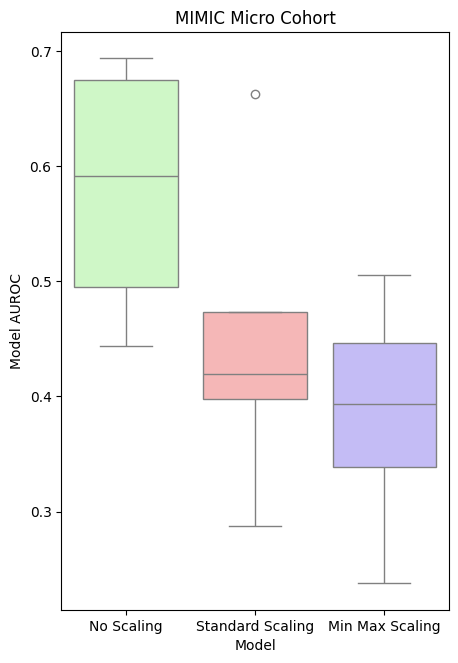

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 7.5))
ax = sns.boxplot(data=boxPlotDf, x='Scaling', y='AUROC Scores', hue='Scaling', palette=['#caffbf', '#ffadad', '#bdb2ff'])
ax.set(xticklabels=['No Scaling', 'Standard Scaling', 'Min Max Scaling'])
ax.set(xlabel='Model')
ax.set(ylabel='Model AUROC')
ax.set_title('MIMIC Micro Cohort')
plt.show()